In [16]:
## NOT WORKING

In [ ]:
# https://xcitech.github.io/tutorials/heroku_tutorial/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
read_df = pd.read_csv('Clean_Data/ML_2015_CLEAN.csv', encoding='utf-8')

In [3]:
read_df.columns

Index(['GeoID', 'Year', 'D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp', 'G_Pay',
       'Pop_2015', 'FD_num_2015', 'FD_pct_2015'],
      dtype='object')

In [4]:
print(read_df.dtypes)
read_df.head()

GeoID            int64
Year             int64
D_Etab           int64
D_Emp            int64
D_Pay            int64
G_Etab           int64
G_Emp            int64
G_Pay            int64
Pop_2015         int64
FD_num_2015      int64
FD_pct_2015    float64
dtype: object


,GeoID,Year,D_Etab,D_Emp,D_Pay,G_Etab,G_Emp,G_Pay,Pop_2015,FD_num_2015,FD_pct_2015
0,1001,2015,11,93,1703,5,283,5691,55035,17497,32.06
1,1003,2015,50,429,7054,30,1774,36515,203690,30561,16.77
2,1005,2015,8,60,844,4,159,2733,26270,6070,22.11
3,1007,2015,5,40,596,5,111,2497,22561,969,4.23
4,1015,2015,34,263,4461,29,832,15066,115285,27786,23.43


In [ ]:
# Select only columns we want to use in ML
# df = read_df[['D_Etab', 'G_Etab', 'Pop_2015', 'FD_num_2015', 'FD_pct_2015']]

In [ ]:
read_df.describe()

In [ ]:
read_df.corr()

In [ ]:
# Plot Dollar Store and Population
read_df.plot(x='D_Etab', y='Pop_2015', style='o')  
plt.title('Dollar Store & County Population')  
plt.xlabel('Dollar Stores')  
plt.ylabel('County Pop')

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

# Very strong correlation

In [ ]:
# Plot correlation between Dollar Stores & Pop with Low Access to food
read_df.plot(x='D_Etab', y='FD_num_2015', style='o')  
plt.title('Dollar Store & Low Food Access Population')  
plt.xlabel('Dollar Stores')  
plt.ylabel('Low Access Food Pop Count')

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

# Strong correlation

In [ ]:
# Plot Dollar Stores & Percent of Pop w Low Access
read_df.plot(x='D_Etab', y='FD_pct_2015', style='o')  
plt.title('Dollar Store & Low Food Access Percentage')  
plt.xlabel('Dollar Stores')  
plt.ylabel('Low Access Food Pop Percent')

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

## Strange if not little correlation

In [ ]:
# Plot Grocery Stores &  Pop with Low Access to food
read_df.plot(x='G_Etab', y='FD_num_2015', style='o')  
plt.title('Grocery Store & Low Food Access Population')  
plt.xlabel('Grocery Stores')  
plt.ylabel('Low Access Food Pop Count')

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

# Why is this not a negative correlation?

### Train model & Set Target


In [4]:
# Select columns for machine learning processing
mldf = read_df[['D_Etab', 'G_Etab', 'Pop_2015', 'FD_num_2015']]

In [5]:
mldf.columns

Index(['D_Etab', 'G_Etab', 'Pop_2015', 'FD_num_2015'], dtype='object')

In [6]:
# REFERENCE: 21.01.Stu_Respiratory_Disease
# Assign X (data) & y (target)
X = mldf[['D_Etab', 'Pop_2015', 'FD_num_2015']]
y = mldf['G_Etab'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1503, 3) (1503, 1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
predictions = model.predict(X_test)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

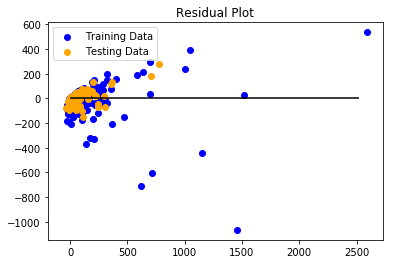

In [10]:
# Plot data selection
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [11]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8147899461672728
Testing Score: 0.7198608722330415


In [12]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[ 2.17163567e+00  1.68845115e-04 -8.68569819e-04]]
y-axis intercept:  [-9.05764609]


In [14]:
predictions

array([[ 1.49428614e+00],
       [ 7.81261752e+00],
       [ 1.03187693e+02],
       [ 2.09076846e+01],
       [ 6.36623449e+00],
       [-3.41417529e+00],
       [ 1.39990923e+01],
       [ 1.21546288e+01],
       [ 2.30299735e+02],
       [ 8.39015450e+01],
       [-4.71154149e+00],
       [ 2.22840389e+01],
       [ 5.04402640e+01],
       [ 1.67367090e+01],
       [ 6.71285980e+00],
       [ 1.53537513e+01],
       [ 3.02795118e+00],
       [ 1.88893657e+01],
       [ 3.67899087e+01],
       [-4.54775515e+00],
       [ 7.78553793e+00],
       [ 5.15290586e+00],
       [ 1.02348857e+00],
       [ 1.45270185e+01],
       [ 3.58661408e-01],
       [ 5.56671443e+01],
       [-3.60975240e+00],
       [ 9.04841809e+00],
       [ 2.63786652e+01],
       [ 1.80657606e+01],
       [ 4.10902073e+01],
       [-7.55190150e-01],
       [ 6.99305648e-01],
       [ 1.55979650e+01],
       [ 4.00183907e-01],
       [ 9.80328099e+00],
       [ 7.59327661e+00],
       [ 3.63427417e+01],
       [-2.9

In [15]:
y_test

array([[  6],
       [  9],
       [ 48],
       [ 11],
       [ 11],
       [  3],
       [ 17],
       [  8],
       [214],
       [ 90],
       [ 11],
       [ 38],
       [ 32],
       [ 13],
       [  5],
       [  9],
       [  6],
       [ 11],
       [111],
       [  5],
       [  5],
       [  3],
       [  3],
       [ 35],
       [  8],
       [ 16],
       [  6],
       [  6],
       [ 34],
       [ 27],
       [ 14],
       [  4],
       [  5],
       [  8],
       [  5],
       [ 19],
       [  4],
       [ 27],
       [  3],
       [ 31],
       [  7],
       [ 52],
       [  6],
       [ 13],
       [262],
       [ 12],
       [ 45],
       [ 27],
       [  6],
       [ 17],
       [ 17],
       [  7],
       [ 61],
       [  7],
       [ 30],
       [ 10],
       [ 12],
       [  3],
       [ 25],
       [ 23],
       [ 31],
       [ 31],
       [315],
       [  6],
       [ 12],
       [ 15],
       [  6],
       [ 15],
       [  4],
       [282],
       [  3],
      

In [26]:
check_df = pd.DataFrame({'Actual': y_test_std, 'Predicted': predictions})
print(len(check_df))
check_df.head()

SyntaxError: invalid syntax (<ipython-input-26-3852fbae9a15>, line 1)

In [ ]:
X = mldf.drop("G_Etab", axis=1) # drop target feature column
y = mldf["G_Etab"]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale Data with Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.datasets import make_regression

n_features = 3
n_samples = len(mldf)
X_train_std, y_train = make_regression(n_samples=n_samples, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train_std, y_train)

In [ ]:
X_train_std

In [ ]:
training_score = model.score(X_train_std, y_train)
testing_score = model.score(X_test_std, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

In [ ]:
predictions=model.predict(X_test)
print(len(predictions))

In [ ]:
# Plot data selection
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [ ]:
check_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(len(check_df))
check_df.head()

In [ ]:
from sklearn.datasets import make_regression

n_features = 3
n_samples = len(mldf)
X_train, y_train = make_regression(n_samples=n_samples, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)

In [ ]:
X_train.head()

### Make pipeline

In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.externals import joblib

### Scale data

In [ ]:
# Min Max Scaler

from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Robust Scaler
# https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

# from sklearn.preprocessing import RobustScaler
# robust = RobustScaler(quantile_range = (0.1,0.9))
# robust.fit_transform(X_train.f3.values.reshape(-1, 1))

In [ ]:
# Standard Scaler: Less sensitive to outliers
# https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-II-Datasets-Partitioning-Feature-scaling-Feature-Selection-Regularization.php

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Plot scaled data comparison

xx = np.arange(len(X_train_std))
yy1 = X_train_scaled[:,1] # Overfitted
yy2 = X_train_std[:,1]
plt.scatter(xx, yy2, color='r')
plt.scatter(xx, yy1, color='b')


In [ ]:
check_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(len(check_df))
check_df.head()

## Machine Learning

In [ ]:
# Used example of Example 21.1.2 Stu_LSD
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train_std, y_train)
training_score = model.score(X_train_std, y_train)
testing_score = model.score(X_test_std, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

# 'D_Etab', 'D_Emp', 'D_Pay', 'G_Emp','G_Pay'


In [ ]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

In [ ]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train_std), model.predict(X_train_std) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_std), model.predict(X_test_std) - y_test, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [ ]:
predictions=model.predict(X_test_std)
print(len(predictions))

In [ ]:
check_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(len(check_df))
check_df.head()

In [ ]:
# Evaluate performance of algorithm with error margins
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

### In a Pickle 🥒

In [ ]:
import pickle

In [ ]:
filename='Regressor_model.sav'

In [ ]:
pickle.dump(model, open(filename, 'wb'))

In [ ]:
load_lr_model =pickle.load(open(filename, 'rb'))

In [ ]:
load_lr_model.coef_

In [ ]:
y_load_predit=load_lr_model.predict(X_test)

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(model, 'reg_1.sav')

In [ ]:
joblib_model= joblib.load('reg_1.sav')

In [ ]:
import json
model_param = {}
model_param['coef'] = list(model.coef_)
model_param['intercept'] = model.intercept_.tolist()

In [ ]:
json_txt = json.dumps(model_param, indent=4)


In [ ]:
with open('regressor_param.txt', 'w') as file:
    file.write(json_txt)

In [ ]:
with open('regressor_param.txt', 'r') as file:
    json_text=json.load(file)
json_text

In [ ]:
# Create the GridSearchCV model (Cross Value model)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10], # how many times run
              'gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid, verbose=3)

### Make Predictions 

In [ ]:
nn_predict = model.predict(X)

In [ ]:
nn_predict

In [ ]:
nn_df = pd.DataFrame({'New':nn_predict})

In [ ]:
nn_df.head()

In [ ]:
# https://machinelearningmastery.com/make-predictions-scikit-learn/

In [ ]:
X, y = make_regression(n_samples=11607, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)

In [ ]:
Xnew, _ = make_regression(
    n_samples=11607, n_features=n_features, noise=0.5, random_state=42)
print(X.shape, y.shape)

In [ ]:

new_predictions = model.predict(Xnew)

In [ ]:
new_df = pd.DataFrame({'New':new_predictions})

In [ ]:
new_df.head()

In [ ]:
xfit = np.linspace(-1,11)

In [ ]:
Xfit = xfit[:, np.]

In [ ]:
# check_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'New':new_predictions})

In [ ]:
# check_df.head()

### More prediction test

In [ ]:
# https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/

In [ ]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
 

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [ ]:
series = Series.from_csv('mldata_clean.csv')
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

In [ ]:
# Make pipline
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_std, y_train)
joblib.dump(pipe, 'model.pkl')

In [ ]:
#Loading the saved model with joblib
pipe = joblib.load('model.pkl')

In [ ]:
# New data to predict
pr = pd.read_csv('mldata_clean.csv')
pred_cols = list(pr.columns.values)[:-1]

In [ ]:
# apply the whole pipeline to data
pred = pd.Series(pipe.predict(pr[pred_cols]))
print(pred)